<a href="https://colab.research.google.com/github/AyushMaria/Vortex-Detection/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as font_manager
from pandas.plotting import scatter_matrix
from datetime import datetime,timedelta
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
mount='/content/gdrive'
drive.mount(mount, force_remount=True)

Mounted at /content/gdrive


In [ ]:
drive_root=mount + '/My Drive/Colab Notebooks/Object Detection'
%cd $drive_root
%pwd

/content/gdrive/My Drive/Colab Notebooks/Object Detection


'/content/gdrive/My Drive/Colab Notebooks/Object Detection'

In [ ]:
df=pd.read_csv('final.csv')
df=df.dropna()
df.insert(loc=0, column='row_num', value=np.arange(len(df)))
df=df.drop(columns=['ID','localX', 'localY'])
df

,row_num,contourArea,areaPercDiff,aspectRatio,momentLocDiff,label,Z,Y
0,0,672.0,67.741935,1.032258,23.953869,vortex,618.948914,359.820099
1,1,1847.0,26.633021,0.768421,48.214767,vortex,615.438660,356.447906
2,2,842.5,20.369923,0.468085,21.503258,no_vortex,619.977661,361.394348
3,3,1727.5,67.904874,0.905660,18.863678,vortex,614.544312,371.880157
4,4,319.0,69.956140,0.791667,58.618599,vortex,604.827698,369.095764
...,...,...,...,...,...,...,...,...
189,129,665.5,32.180850,1.068182,8.219887,vortex,602.539700,212.176100
190,130,665.0,28.976040,1.133333,11.307780,vortex,602.676900,212.714200
191,131,329.5,36.489480,2.047619,19.413250,vortex,603.630200,213.520200
192,132,5100.5,40.364830,0.923077,7.025131,no_vortex,602.270000,216.114800


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Vortex:  71
Non - Vortex:  63


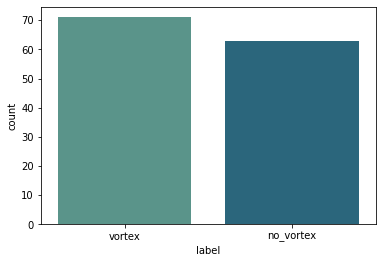

In [ ]:
y=df['label']
X = df[['contourArea','areaPercDiff','aspectRatio','momentLocDiff']]
z = df['areaPercDiff']
ax=sns.countplot(y,label='count', palette='crest')
V,NV = y.value_counts()
print('Vortex: ',V)
print('Non - Vortex: ',NV)

No handles with labels found to put in legend.


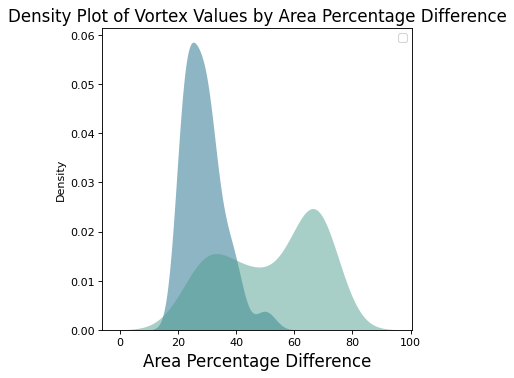

In [ ]:
plt.figure(figsize=(5,5), dpi= 80)
sns.kdeplot(data=df, x="areaPercDiff", hue="label", fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
plt.title('Density Plot of Vortex Values by Area Percentage Difference', fontsize=15)
plt.xlabel("Area Percentage Difference",fontsize=15)
plt.legend()
plt.show()

In [ ]:
X['label']=y

<Figure size 1200x800 with 0 Axes>

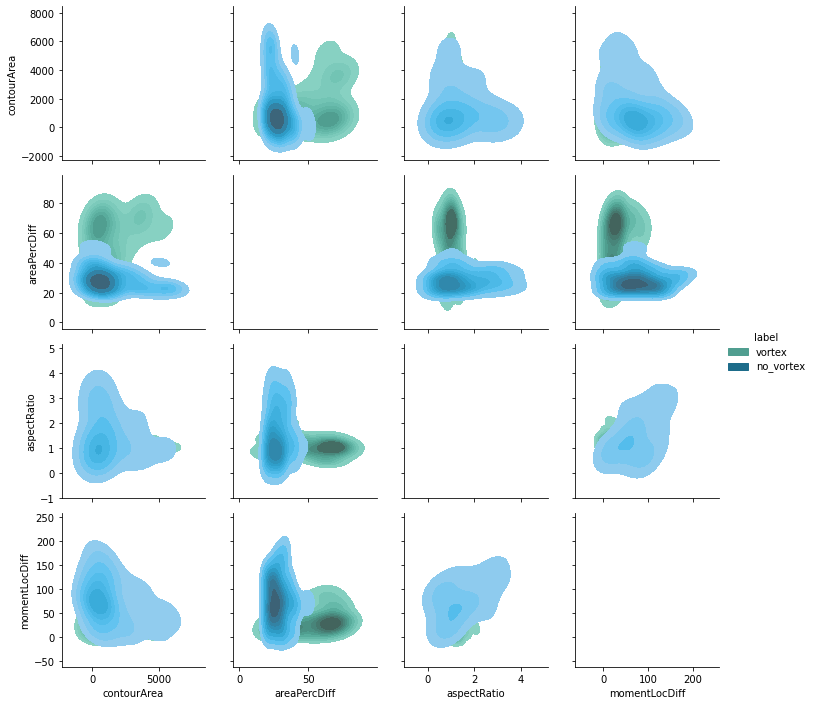

In [ ]:
plt.figure(figsize=(15,10), dpi= 80)
g = sns.PairGrid(X, hue='label',palette='crest')
g.map_diag(sns.scatterplot)
g.map_offdiag(sns.kdeplot, fill=True)
g.add_legend()

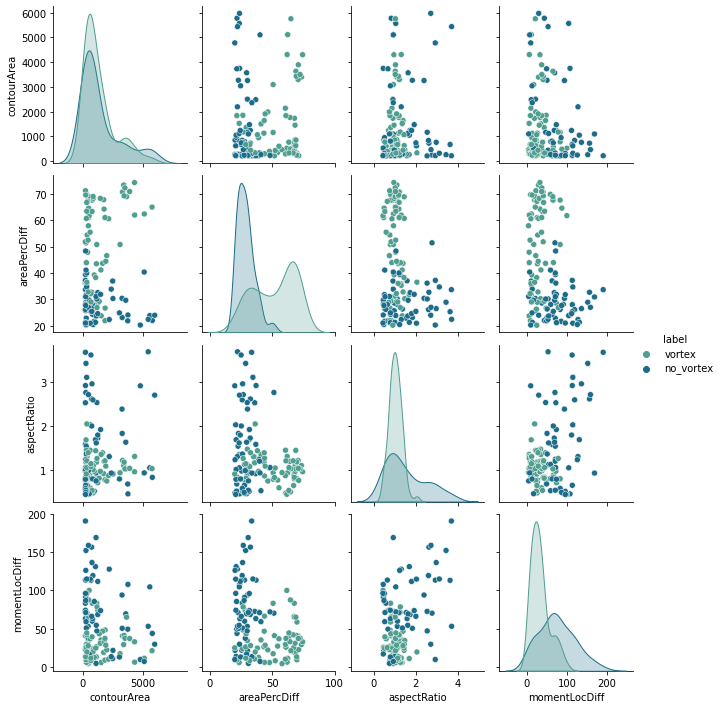

In [ ]:
g=sns.pairplot(X, hue="label", palette='crest')
g.fig.set_size_inches(10,10)


<Figure size 1200x800 with 0 Axes>

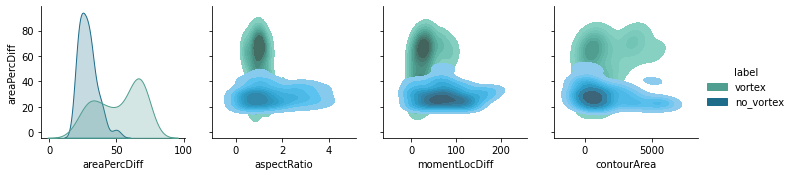

In [ ]:
plt.figure(figsize=(15,10), dpi= 80)
x_vars = ["areaPercDiff", "aspectRatio", "momentLocDiff", "contourArea"]
y_vars = ["areaPercDiff"]
g = sns.PairGrid(X, hue='label', x_vars=x_vars, y_vars=y_vars, palette='crest')
g.map_diag(sns.kdeplot, fill=True)
g.map_offdiag(sns.kdeplot, fill=True)
g.add_legend()

In [ ]:
X=X.drop(columns=['label'])
M=X['areaPercDiff']


In [62]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([y,data_n_2.iloc[:,]],axis=1)
data = pd.melt(data,id_vars="label",var_name="features", value_name='value')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

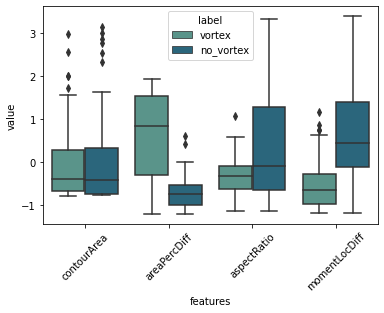

In [ ]:
sns.boxplot(x="features", y="value", hue="label", data=data, palette='crest')
plt.xticks(rotation=45)

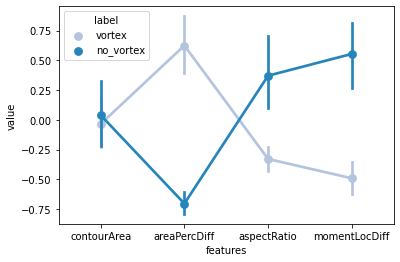

In [ ]:
ax = sns.pointplot(x="features", y="value", hue="label", data=data, palette="PuBu")

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

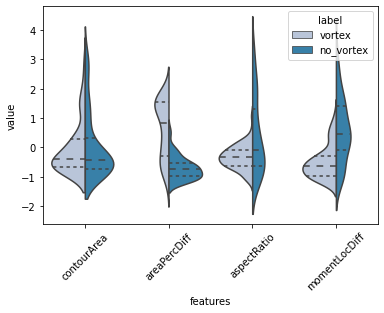

In [ ]:
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart", palette='PuBu')
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



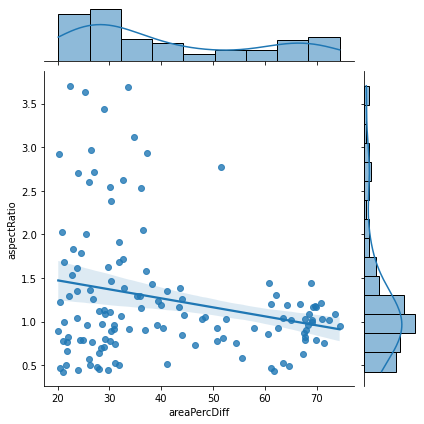

In [ ]:
sns.jointplot(X.loc[:,'areaPercDiff'],X.loc[:,'aspectRatio'],kind="reg");

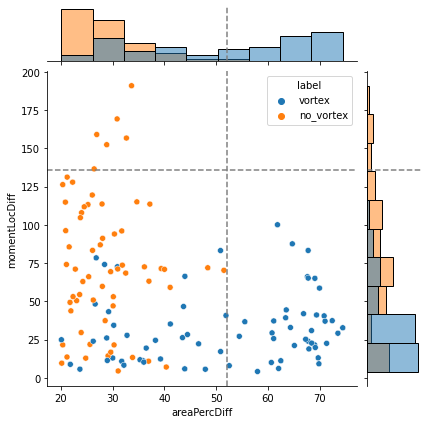

In [ ]:
g = sns.JointGrid(data=df, x="areaPercDiff", y="momentLocDiff", hue='label')
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=52, y=136)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

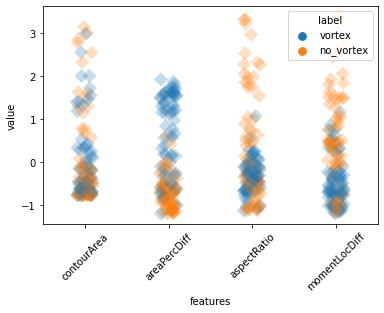

In [ ]:
sns.stripplot(x="features", y="value", hue="label", data=data, marker="D", size=10, edgecolor="gray", alpha=.25)
plt.xticks(rotation=45)

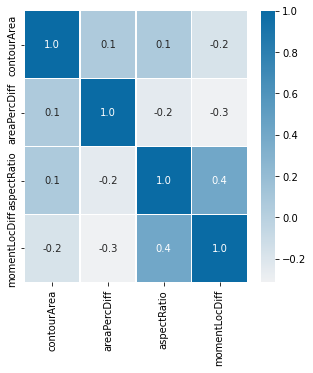

In [ ]:
f,ax = plt.subplots(figsize=(5,5))
cmap = sns.light_palette("#0a6ba4", as_cmap=True)
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap);

In [ ]:
M=X.drop(columns=['contourArea','aspectRatio','momentLocDiff'])

In [ ]:
data_dia = y
data = M
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([y,data_n_2.iloc[:,]],axis=1)
data = pd.melt(data,id_vars="label",var_name="features", value_name='value')

(array([0]), <a list of 1 Text major ticklabel objects>)

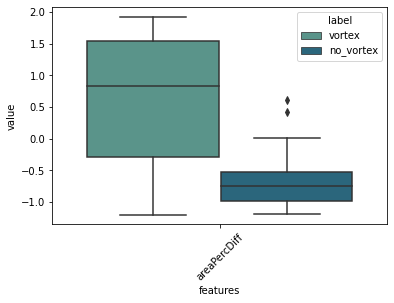

In [37]:
sns.boxplot(x="features", y="value", hue="label", data=data, palette='crest')
plt.xticks(rotation=45)